In [1]:
from ramCOH.signal_processing import functions as f
import ramCOH.raman as ram
from ramCOH.signal_processing import curves as c
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
ol_file = "./olivine/PI081-05-04_2022_03_01_15_20_46_532nm_Edge_100�_x100_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

In [3]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect(olivine.birs, smooth_factor=1)
olivine.calculate_noise()
olivine.noise

18.346426175857115

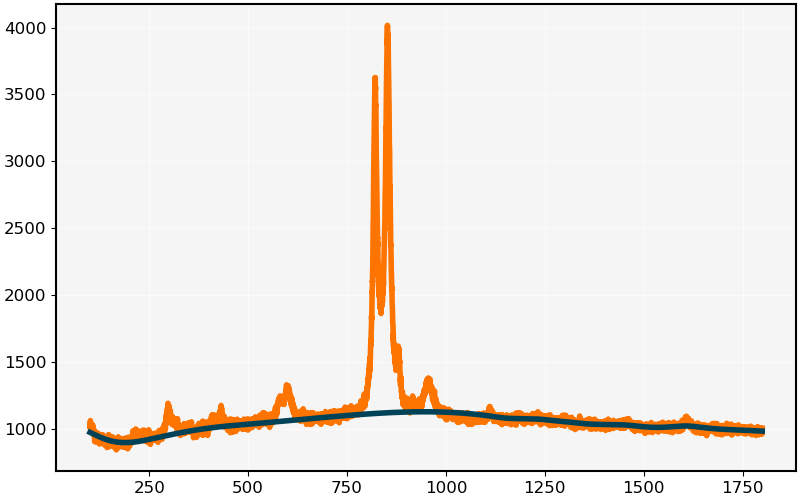

In [4]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, olivine.baseline)

# plt.plot(olivine.x, olivine.intensities["BC"])

plt.show()

In [5]:
olivine.deconvolve()

max y: 239.02393764661576, range [184.76614024770674, 353.66947245609873], threshold: 1.33286366203325
max y: 158.27830281418187, range [413.4546307923292, 449.8373692076708], threshold: 1.315005576385139
max y: 268.0780646752878, range [450.04816507896464, 743.8818349210354], threshold: 1.3392894098769055
max y: 2893.7707720213775, range [785.8427656675441, 1042.4804899547894], threshold: 1.9200000000000004
max y: 71.18472855542336, range [1090.0947256619747, 1132.0252743380252], threshold: 1.2957435504967962


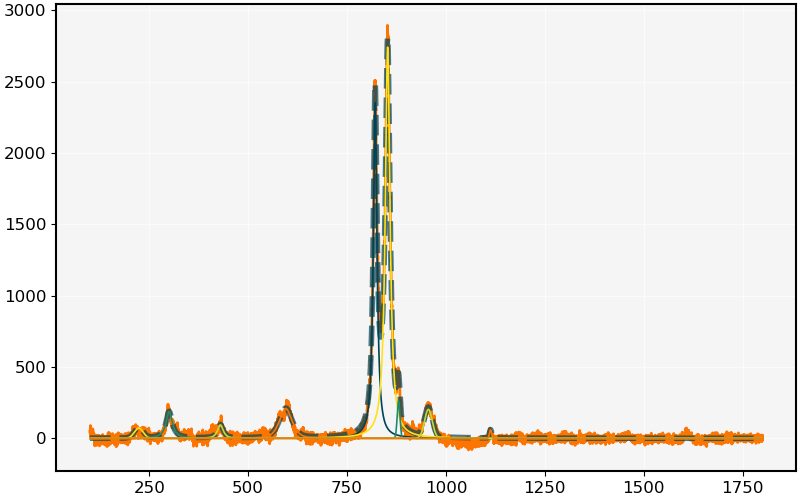

In [6]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, c.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.deconvoluted_peaks:
    plt.plot(olivine.x, c.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [7]:
olivine.deconvolution_parameters

[array([ 223.41008552,  300.1492822 ,  429.74600444,  595.10230667,
         821.08084914,  852.66313567,  880.30199329,  955.75372203,
        1112.9003805 ]),
 array([  72.23316389,  187.74198706,   93.89213307,  208.39014382,
        2352.04503788, 2741.58932045,  263.2810905 ,  202.4685434 ,
          58.33649119]),
 array([11.08418365,  9.46258396,  8.22204054, 17.0481959 ,  5.57936601,
         7.18296588,  3.49003391,  9.71503036,  2.84019436]),
 array([4.69002663e-02, 1.00000000e+00, 7.91413788e-01, 4.82698544e-01,
        9.74891625e-01, 1.00000000e+00, 1.62102615e-10, 1.11438538e-13,
        3.86969929e-29]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.])]